In [13]:
#import
import requests
import json
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import api key
from config import nas_api_key

In [14]:
#aquire zip code date from csv
zipcode = "Resources/Seattle_Zip_Data.csv"
zipcode_data_df = pd.read_csv(zipcode)
zipcode_data_df = zipcode_data_df.dropna()
zip_codes = zipcode_data_df["Zip Code"]

In [15]:
#assign variables
api_key = nas_api_key
indicator_id = "ZSFH"
region_id = zip_codes

#add empty list
zillow_list = []


#iterate through selected regions then data and append to empty list
for region in region_id:
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id={indicator_id}&region_id={region}&api_key={api_key}"   
    zillow = requests.get(url).json()
    
    zillow_data = zillow['datatable']['data']
    iterations_zillow = range(0,len(zillow_data))
    
    for i in iterations_zillow:
        zillow_list.append(zillow_data[i])

#create dataframe

zillow_df = pd.DataFrame(zillow_list, columns=['Indicator ID', 'Zip Code', 'Date', 'Average Value'])
zillow_df

,Indicator ID,Zip Code,Date,Average Value
0,ZSFH,98101,2022-12-31,728473.0
1,ZSFH,98101,2022-11-30,737338.0
2,ZSFH,98101,2022-10-31,752946.0
3,ZSFH,98101,2022-09-30,735541.0
4,ZSFH,98101,2022-08-31,742256.0
...,...,...,...,...
6259,ZSFH,98199,1996-05-31,214738.0
6260,ZSFH,98199,1996-04-30,216207.0
6261,ZSFH,98199,1996-03-31,217506.0
6262,ZSFH,98199,1996-02-29,217997.0


In [16]:
#add quarterly date values to dataframe
zillow_df["Date"] = pd.to_datetime(zillow_df["Date"])
zillow_df["Quarter"] = zillow_df["Date"].dt.to_period('Q')

zillow_df

,Indicator ID,Zip Code,Date,Average Value,Quarter
0,ZSFH,98101,2022-12-31,728473.0,2022Q4
1,ZSFH,98101,2022-11-30,737338.0,2022Q4
2,ZSFH,98101,2022-10-31,752946.0,2022Q4
3,ZSFH,98101,2022-09-30,735541.0,2022Q3
4,ZSFH,98101,2022-08-31,742256.0,2022Q3
...,...,...,...,...,...
6259,ZSFH,98199,1996-05-31,214738.0,1996Q2
6260,ZSFH,98199,1996-04-30,216207.0,1996Q2
6261,ZSFH,98199,1996-03-31,217506.0,1996Q1
6262,ZSFH,98199,1996-02-29,217997.0,1996Q1


In [17]:
#drop duplicate quarters, drop extra index column and reset index
zillow_drop_df = zillow_df.drop_duplicates(subset=['Quarter', 'Zip Code']).reset_index().drop(columns=["index",])

zillow_groupby_q = round(zillow_drop_df.groupby("Quarter").mean(),2)

zillow_groupby_q

,Average Value
Quarter,
1996Q1,164385.14
1996Q2,164756.29
1996Q3,164713.86
1996Q4,165585.71
1997Q1,151063.67
...,...
2022Q1,526381.97
2022Q2,549312.35
2022Q3,546091.42


In [18]:
#assign variables
api_key = nas_api_key
start_date = "1996-03-01"
end_date = "2023-01-01"
url1 = "RATEINF"
url2 = "CPI_USA"

#create empty list
federal_list = []

#get data request from url
url = f"https://data.nasdaq.com/api/v3/datasets/{url1}/{url2}.json?start_date={start_date}&end_date={end_date}&api_key={api_key}"
    
federal = requests.get(url).json()

#iterate through selected data and append to empty list
federal_data = federal["dataset"]["data"]
iterations_federal = range(0,len(federal_data))

for i in iterations_federal:
    federal_list.append(federal_data[i])

#create dataframe
federal_df = pd.DataFrame(federal_list, columns=['Date', url2])
federal_df


,Date,CPI_USA
0,2022-12-31,296.797
1,2022-11-30,297.711
2,2022-10-31,298.012
3,2022-09-30,296.808
4,2022-08-31,296.171
...,...,...
317,1996-07-31,157.000
318,1996-06-30,156.700
319,1996-05-31,156.600
320,1996-04-30,156.300


In [19]:
#add quarter time period to data
federal_df["Date"] = pd.to_datetime(federal_df["Date"])
federal_df["Quarter"] = federal_df["Date"].dt.to_period('Q')

#remove duplicates drop excess column and reset index
federal_df = federal_df.drop_duplicates(subset=['Quarter']).reset_index().drop(columns=["index"])

#adjusted the CPI to set the index value to Q4 2022 to show inflation from that date and add new column
federal_df["Adjusted CPI"] = federal_df["CPI_USA"].div(federal_df["CPI_USA"][0])

federal_df

,Date,CPI_USA,Quarter,Adjusted CPI
0,2022-12-31,296.797,2022Q4,1.000000
1,2022-09-30,296.808,2022Q3,1.000037
2,2022-06-30,296.311,2022Q2,0.998363
3,2022-03-31,287.504,2022Q1,0.968689
4,2021-12-31,278.802,2021Q4,0.939369
...,...,...,...,...
103,1997-03-31,160.000,1997Q1,0.539089
104,1996-12-31,158.600,1996Q4,0.534372
105,1996-09-30,157.800,1996Q3,0.531677
106,1996-06-30,156.700,1996Q2,0.527970


In [20]:
#merge dataframes on "Quarter"
merged_df = pd.merge(zillow_groupby_q, federal_df, on="Quarter")
merged_df

,Quarter,Average Value,Date,CPI_USA,Adjusted CPI
0,1996Q1,164385.14,1996-03-31,155.700,0.524601
1,1996Q2,164756.29,1996-06-30,156.700,0.527970
2,1996Q3,164713.86,1996-09-30,157.800,0.531677
3,1996Q4,165585.71,1996-12-31,158.600,0.534372
4,1997Q1,151063.67,1997-03-31,160.000,0.539089
...,...,...,...,...,...
103,2021Q4,509084.07,2021-12-31,278.802,0.939369
104,2022Q1,526381.97,2022-03-31,287.504,0.968689
105,2022Q2,549312.35,2022-06-30,296.311,0.998363
106,2022Q3,546091.42,2022-09-30,296.808,1.000037


In [21]:
#add column for adjusted home values based of CPI
merged_df["Adjusted Value"] = round(merged_df["Average Value"]/merged_df["Adjusted CPI"],2)
merged_df

,Quarter,Average Value,Date,CPI_USA,Adjusted CPI,Adjusted Value
0,1996Q1,164385.14,1996-03-31,155.700,0.524601,313352.71
1,1996Q2,164756.29,1996-06-30,156.700,0.527970,312055.98
2,1996Q3,164713.86,1996-09-30,157.800,0.531677,309800.88
3,1996Q4,165585.71,1996-12-31,158.600,0.534372,309869.75
4,1997Q1,151063.67,1997-03-31,160.000,0.539089,280220.28
...,...,...,...,...,...,...
103,2021Q4,509084.07,2021-12-31,278.802,0.939369,541942.40
104,2022Q1,526381.97,2022-03-31,287.504,0.968689,543396.23
105,2022Q2,549312.35,2022-06-30,296.311,0.998363,550213.31
106,2022Q3,546091.42,2022-09-30,296.808,1.000037,546071.18


In [22]:
print(merged_df["Adjusted Value"].min())
print(merged_df["Adjusted Value"].max())

263317.82
621903.4


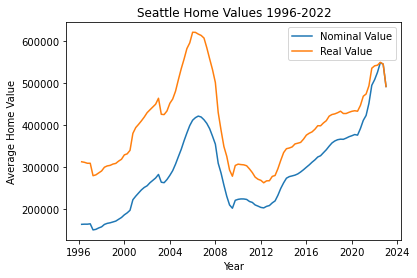

In [23]:
#plot based on average and adjusted values
merged_df["Adjusted Value"].max()
plt.plot(merged_df["Date"], merged_df["Average Value"])
plt.plot(merged_df["Date"], merged_df["Adjusted Value"])

plt.title("Seattle Home Values 1996-2022")
plt.xlabel("Year")
plt.ylabel("Average Home Value")
plt.legend(["Nominal Value", "Real Value"])

#save graph image
plt.savefig("graphs/HVTS.png")